# Use the Scatterwidget with AnnData from Notebook

This tutorial is an example of how to use the Napari-Spatialdata ScatterWidget from a notebook.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`

In [ ]:
from napari_spatialdata import QtAdataScatterWidget
import squidpy as sq
import matplotlib.pyplot as plt

Load in the AnnData:

In [2]:
adata = sq.datasets.visium_hne_adata()

The following line is needed to initialize a widget without a QApplication:

In [ ]:
%gui qt5

Open the ScatterWidget:

In [ ]:
widget = QtAdataScatterWidget(adata)
widget.show()

The widget:

(-0.5, 861.5, 719.5, -0.5)

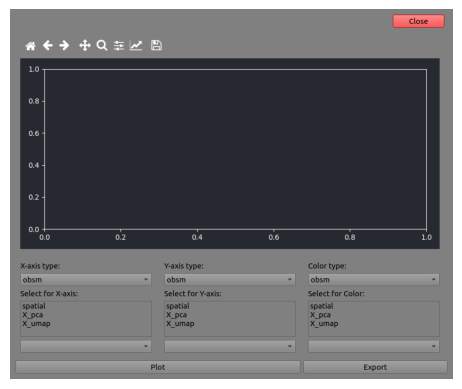

In [6]:
plt.imshow(widget.screenshot())
plt.axis('off')

Some examples of scatterplots:

(-0.5, 861.5, 719.5, -0.5)

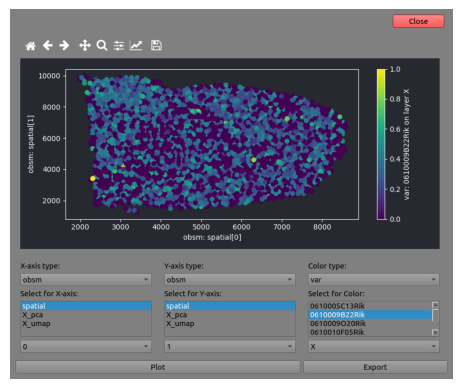

In [8]:
plt.imshow(widget.screenshot())
plt.axis('off')

(-0.5, 861.5, 719.5, -0.5)

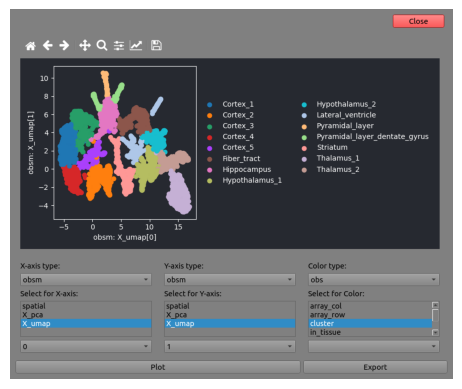

In [11]:
plt.imshow(widget.screenshot())
plt.axis('off')